In [1]:
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
digits = datasets.load_digits()

In [3]:
for key, value in digits.items():
  try:
    print(key,value.shape)
  except:
    print(key)

data (1797, 64)
target (1797,)
frame
feature_names
target_names (10,)
images (1797, 8, 8)
DESCR


In [4]:
type(digits.data)

numpy.ndarray

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim = 64))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              66560     
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 76,810
Trainable params: 76,810
Non-trainable params: 0
_________________________________________________________________


In [8]:
history=model.fit(x_train, y_train, batch_size=16, epochs=50, validation_split=0.2)

Epoch 1/50
72/72 [==============================] - 1s 5ms/step - loss: 0.5542 - accuracy: 0.8460 - val_loss: 0.1519 - val_accuracy: 0.9618
Epoch 2/50
72/72 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9661 - val_loss: 0.1288 - val_accuracy: 0.9688
Epoch 3/50
72/72 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9774 - val_loss: 0.1666 - val_accuracy: 0.9375
Epoch 4/50
72/72 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9748 - val_loss: 0.0829 - val_accuracy: 0.9722
Epoch 5/50
72/72 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9782 - val_loss: 0.1265 - val_accuracy: 0.9688
Epoch 6/50
72/72 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9748 - val_loss: 0.1044 - val_accuracy: 0.9792
Epoch 7/50
72/72 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9887 - val_loss: 0.0892 - val_accuracy: 0.9757
Epoch 8/50
72/72 [==

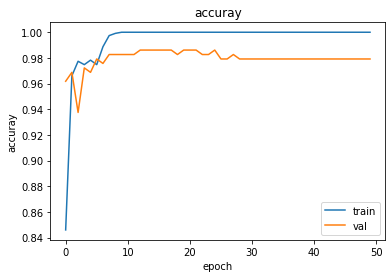

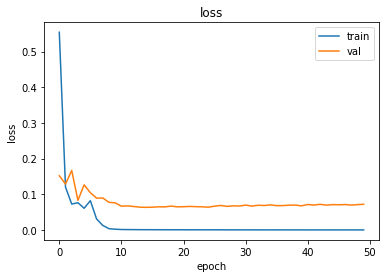

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuray')
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, batch_size=16)
print("score:", score)

23/23 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9917
score: [0.041955605149269104, 0.9916666746139526]
